# Problem Statement - Credit Card Defualt Status
# Predictive Modeling - Linear Discriminant Analysis

In [1]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Set the working directory

In [2]:
#os.chdir('C:\\GL Class\Solution Preparation\Logistic Regression - Python')

# Import Excel file

Load the Data file into Python DataFrame using pandas read_csv method

Ensure that data set loaded do not have any unicode character 

In [3]:
data_df = pd.read_csv("default.csv")

# View Top 10 rows

head function is used to view the top records. The number records to be view need to be  given in the parenthesis.

In [4]:
data_df.head(10)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2
5,Female,1,Management,12,86,3.6,No,critical,1,personal,4
6,Female,1,Management,15,86,3.6,No,critical,1,personal,4
7,Male,1,skilled,12,85,3.6,No,poor,1,personal,2
8,Male,1,skilled,13,87,3.9,No,critical,1,personal,2
9,Male,1,skilled,13,89,4.0,No,critical,1,personal,0


# Some more basic commands

tail function is used to view the last records. The number records to be view need to be given in the parenthesis.

In [5]:
data_df.tail(20)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
761,Male,1,Management,0,43,14.0,Default,good,0,car,1
762,Male,1,Management,2,47,14.0,Default,verygood,0,car,1
763,Female,1,skilled,5,58,14.0,Default,critical,0,personal,0
764,Female,1,skilled,6,58,14.0,Default,critical,0,personal,0
765,Male,1,skilled,1,42,14.0,Default,critical,0,consumer.durable,0
766,Male,1,skilled,4,47,14.0,Default,critical,0,consumer.durable,0
767,Male,1,skilled,3,47,14.2,Default,critical,0,consumer.durable,0
768,Male,1,skilled,1,42,14.2,Default,critical,0,consumer.durable,0
769,Male,1,skilled,4,52,14.3,Default,good,0,car,0
770,Male,1,skilled,3,42,14.3,Default,good,0,car,0


In [7]:
data_df.describe()

,Loan.Offered,Work.Exp,Credit.Score,EMI.Ratio,Own house,Dependents
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.756722,12.377721,83.597951,9.495006,0.768246,2.081946
std,0.429336,3.809161,12.040410,2.786867,0.422223,1.068641
min,0.000000,0.000000,42.000000,3.000000,0.000000,0.000000
25%,1.000000,11.000000,83.000000,7.400000,1.000000,2.000000
50%,1.000000,13.000000,87.000000,9.500000,1.000000,2.000000
75%,1.000000,15.000000,91.000000,11.400000,1.000000,3.000000
max,1.000000,19.000000,99.000000,15.000000,1.000000,4.000000


In [6]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house           int64
Purpose            object
Dependents          int64
dtype: object

In [8]:
type(data_df)

pandas.core.frame.DataFrame

# Check for missing values

In [9]:
data_df.isnull().sum()

Gender            0
Loan.Offered      0
Job               0
Work.Exp          0
Credit.Score      0
EMI.Ratio         0
Status            0
Credit.History    0
Own house         0
Purpose           0
Dependents        0
dtype: int64

No Missing values

In [10]:
data_df.shape ### 781 rows and 11 features

(781, 11)

# Convert Own House into object

In [10]:
data_df['Own house']=data_df['Own house'].astype('object')

# Find out unique values in each categorical column



In [11]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
data_df['Job'].unique()

array(['unskilled', 'skilled', 'Management'], dtype=object)

In [13]:
data_df['Status'].unique() ### No means No Default

array(['No', 'Default'], dtype=object)

In [14]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'very good', 'verygood', 'Poor'],
      dtype=object)

In [15]:
data_df['Own house'].unique()

array([1, 0], dtype=object)

In [17]:
data_df['Purpose'].unique()

array(['personal', 'car', 'education', 'consumer.durable'], dtype=object)

In [16]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house          object
Purpose            object
Dependents          int64
dtype: object

# Clean the dataset -- Correction in the values

In [17]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='very good', 'verygood', data_df['Credit.History'])

In [18]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='Poor', 'poor', data_df['Credit.History'])

In [19]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'verygood'], dtype=object)

# Count of Default and No Default in the Target Column

In [21]:
data_df['Status'].value_counts()

No         656
Default    125
Name: Status, dtype: int64

# Univariate Plots


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


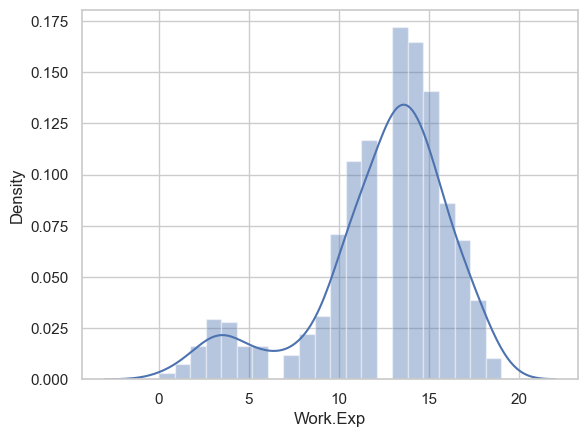

In [22]:
sns.distplot(data_df['Work.Exp']);
plt.show(); ### Not required in this version, inserted just to show that if graph is not printing then this is required

# Bivariate Analysis 


Bivariate shown below is only as a sample.. Reader is adviced to perform complete data exploration process

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


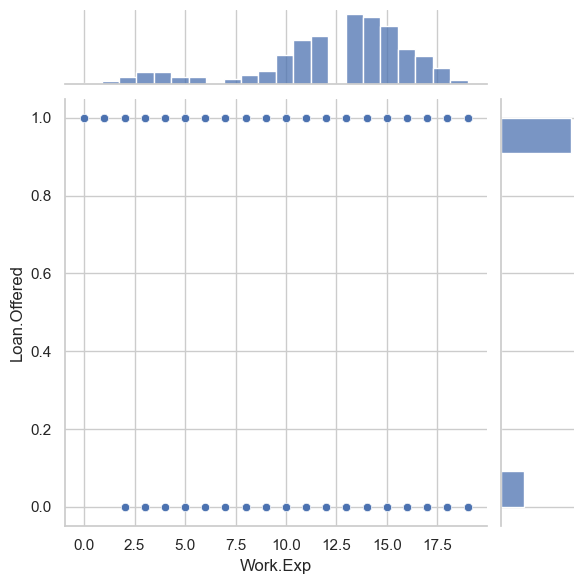

In [23]:
sns.jointplot(data_df['Work.Exp'], data_df['Loan.Offered']) ### annotate function of stats is to print correlation value

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='Work.Exp'>

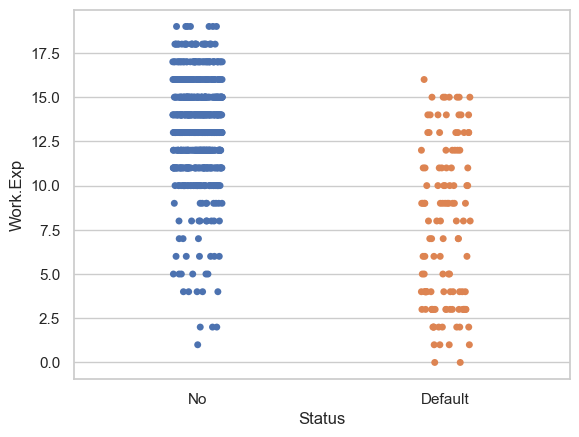

In [24]:
sns.stripplot(data_df['Status'], data_df['Work.Exp']) ### Concentration of observations

Lower Work Experience have more concentration of Default.. Reader is adviced to perform more analysis and generate insight.

# Find the Distribution of Dependent Variable Categories


In [25]:
count_no_sub = len(data_df[data_df['Status']=='No'])
count_sub = len(data_df[data_df['Status']=='Default'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Default", pct_of_sub*100)

percentage of no Default is 83.99487836107554
percentage of Default 16.005121638924454


Distribution is not biased and hence no need to use SMOTE or any other package to balance binary classes

Text(0, 0.5, 'Status')

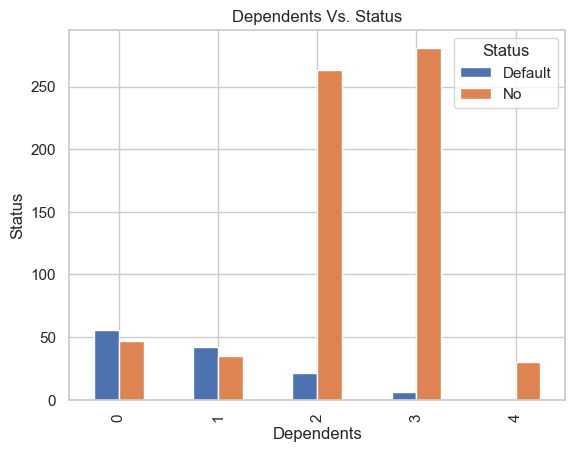

In [26]:
pd.crosstab(data_df.Dependents,data_df.Status).plot(kind='bar')
plt.title('Dependents Vs. Status')
plt.xlabel('Dependents')
plt.ylabel('Status')

Below commands are only done as a good practice.. Not mandatory

In [32]:
data_df.rename(columns = {'Own house':'Ownhouse'}, inplace = True) 
data_df.rename(columns = {'Loan.Offered':'LoanOffered'}, inplace = True) 
data_df.rename(columns = {'Work.Exp':'WorkExp'}, inplace = True) 
data_df.rename(columns = {'Credit.Score':'CreditScore'}, inplace = True) 
data_df.rename(columns = {'EMI.Ratio':'EMIRatio'}, inplace = True) 
data_df.rename(columns = {'Credit.History':'CreditHistory'}, inplace = True) 


In [33]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    781 non-null    int64  
 2   Job            781 non-null    object 
 3   WorkExp        781 non-null    int64  
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    object 
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 67.2+ KB


# Convert Object Feature types for Linear Discriminant Analysis

In [34]:
data_df['Gender']=np.where(data_df['Gender'] =='Male', 1, data_df['Gender'])
data_df['Gender']=np.where(data_df['Gender'] =='Female', 0, data_df['Gender'])

In [35]:
data_df['Job']=np.where(data_df['Job'] =='Management', 1, data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='unskilled', 0, data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='skilled', 2, data_df['Job'])

In [36]:
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='critical', 1, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='poor', 0, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='good', 2, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='verygood', 3, data_df['CreditHistory'])

In [37]:
data_df['Purpose']=np.where(data_df['Purpose'] =='personal', 1, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='car', 0, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='education', 2, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='consumer.durable', 3, data_df['Purpose'])


In [38]:
data_df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,1,0,0,14,86,3.0,No,0,1,1,2
1,0,1,2,15,94,3.0,No,0,1,1,3
2,1,0,0,16,86,3.0,No,0,1,1,2
3,0,1,2,13,94,3.0,No,0,1,1,3
4,1,1,2,12,85,3.3,No,0,1,1,2


In [39]:
#Scaling the data which is a pre-requisite for LDA 
scaler=StandardScaler()
X = scaler.fit_transform(data_df.drop(['Status'],axis=1))
Y = data_df['Status']

In [40]:
Y.value_counts()

No         656
Default    125
Name: Status, dtype: int64

In [41]:
Y.replace({"No":1,"Default":0})

0      1
1      1
2      1
3      1
4      1
      ..
776    0
777    0
778    0
779    0
780    0
Name: Status, Length: 781, dtype: int64

In [42]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [43]:
# Predict it
pred_class = model.predict(X)
data_df['Prediction'] = pred_class 


In [44]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= data_df[['Gender','LoanOffered','Job','WorkExp','CreditScore','EMIRatio','CreditHistory','Ownhouse','Purpose','Dependents']]
Cor1 = data.corr()
Cor1

,LoanOffered,WorkExp,CreditScore,EMIRatio,Dependents
LoanOffered,1.000000,-0.076224,-0.082435,0.057273,-0.029145
WorkExp,-0.076224,1.000000,0.915575,-0.300286,0.408753
CreditScore,-0.082435,0.915575,1.000000,-0.382192,0.490798
EMIRatio,0.057273,-0.300286,-0.382192,1.000000,-0.251782
Dependents,-0.029145,0.408753,0.490798,-0.251782,1.000000


In [45]:
#generate Confusion Matrix
# Please refer for confusion matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(Y, pred_class)


array([[124,   1],
       [ 22, 634]], dtype=int64)

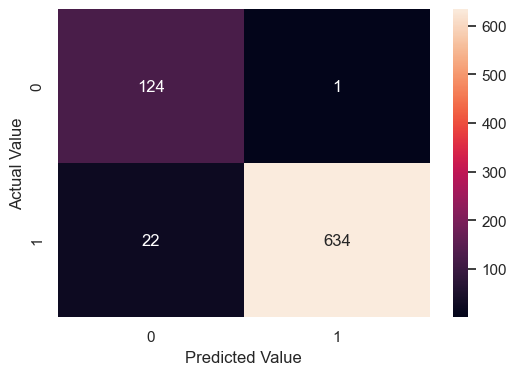

In [46]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

### 146 rows classified as 0 (Default) and 635 rows classified as 1 (Not Default)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

     Default       0.85      0.99      0.92       125
          No       1.00      0.97      0.98       656

    accuracy                           0.97       781
   macro avg       0.92      0.98      0.95       781
weighted avg       0.97      0.97      0.97       781



In [48]:
X.shape

(781, 10)

In [49]:
model.coef_

array([[ 1.137129  , -0.46395456,  0.83372221, -1.08383805,  3.80345376,
        -0.53102867,  0.36191579,  5.95912536,  0.14435512,  2.30379498]])

In [50]:
model.intercept_

array([9.15964746])

### LDF for the above model will be

In [51]:
'''
LDF=9.159+ X1*1.137 + X2*(-0.463) + X3*(0.833) + X4*(-1.083) + X5*3.803 + X6*(-0.531) + X7*0.361 + X8*5.959 + X9*0.144 + X10*2.30
'''

'\nLDF=9.159+ X1*1.137 + X2*(-0.463) + X3*(0.833) + X4*(-1.083) + X5*3.803 + X6*(-0.531) + X7*0.361 + X8*5.959 + X9*0.144 + X10*2.30\n'

### So from the above equation the following things can be summarized as

- the coeff of X8 predictor is largest in magnitude thus it helps in discriminating the target the best 
- the coeff of X2 predictor is smallest in magnitude thus it helps in discriminating the target the least.
- all the DS can be computed for each row using the above f(x) which will aid in classification

## Classification by Discriminant Score

In [52]:
#Computation of Discriminant Scores/LDF for each row of data


DS=[]
coef=[1.137129  , -0.46395456,  0.83372221, -1.08383805,  3.80345376,
        -0.53102867,  0.36191579,  5.95912536,  0.14435512,  2.30379498] # Coefficients 
for p in range(len(X)):
    s3=0
    for q in range(X.shape[1]):
        s3=s3+(X[p,q]*coef[q]) # Building the LDF equation 
    s3=s3+9.159
    DS.append(s3)
    
    

In [54]:
'''
Classification Rule :

if LDF>=0 then Classify as 1 
else if LDF <0 then Classify as 0 
'''


s1=0
s2=0
for i in range(len(X)):
    if DS[i]>=0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],">=0 , Classify as 1}")
        print("------------------------------------------------------------------------------------------")
        s1+=1
    elif DS[i]<0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],"<0 , Classify as 0}")
        print("------------------------------------------------------------------------------------------")
        s2+=1



FOR Row: 0   [ 0.65206018 -1.76366843 -2.20488852  0.42616174  0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { DS:  12.795920822262884 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1   [-1.53360077  0.567       0.58832792  0.68885497  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85963561]

--> { DS:  15.959211343453298 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 2   [ 0.65206018 -1.76366843 -2.20488852  0.9515482   0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { DS:  12.226486990137262 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 3   [-1.53360077  0.567       0.58832792  0.16346851  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85963561]

--> { DS:  16.528645175578

In [55]:
print(s1," rows classified as 1 (Not Default) ")
print(s2," rows classified as 0 (Default) ")

635  rows classified as 1 (Not Default) 
146  rows classified as 0 (Default) 


## Classification by Probability 

In [56]:
pred_prob=model.predict_proba(X)#Posterior Probability for each row

In [57]:
pred_prob[:,1]

array([9.99997230e-01, 9.99999883e-01, 9.99995104e-01, 9.99999934e-01,
       9.99999346e-01, 9.99999818e-01, 9.99999571e-01, 9.99999307e-01,
       9.99999636e-01, 9.99985261e-01, 9.99999641e-01, 9.99964028e-01,
       9.99999504e-01, 9.99999816e-01, 9.99999944e-01, 9.99999600e-01,
       9.99998776e-01, 9.99998879e-01, 9.99999957e-01, 9.99969492e-01,
       9.99968905e-01, 9.99999447e-01, 9.99945047e-01, 9.99999605e-01,
       9.99999805e-01, 9.99945047e-01, 9.99999605e-01, 9.99999000e-01,
       9.99999867e-01, 9.99999426e-01, 9.99999849e-01, 9.99999886e-01,
       9.99999276e-01, 9.99999662e-01, 9.99997674e-01, 9.99998690e-01,
       9.99999591e-01, 9.99998592e-01, 9.99999019e-01, 9.99999578e-01,
       9.99999583e-01, 9.99998721e-01, 9.99999784e-01, 9.99999548e-01,
       9.99999352e-01, 9.99999747e-01, 9.99999878e-01, 9.99999809e-01,
       9.99999421e-01, 9.99999417e-01, 9.99997974e-01, 9.99999957e-01,
       9.99999930e-01, 9.99995647e-01, 9.99998811e-01, 9.99999106e-01,
      

In [58]:
'''
Classification Rule :

if prob(Y=1|X) >=0 then Classify as 1 
else ifprob(Y=1|X) <0 then Classify as 0 
'''


s3,s4=0,0
for i in range(len(pred_prob[:,1])):
    if pred_prob[:,1][i]>=0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">=0.5 , Classify as 1 }")
        print("------------------------------------------------------------------------------------------")
        s3+=1
    elif pred_prob[:,1][i]<0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],"< 0.5 , Classify as 0 }")
        print("------------------------------------------------------------------------------------------")
        s4+=1

  

FOR Row: 0   [ 0.65206018 -1.76366843 -2.20488852  0.42616174  0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { prob(Y=1|X) = 0.999997229744646 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1   [-1.53360077  0.567       0.58832792  0.68885497  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85963561]

--> { prob(Y=1|X) = 0.9999998828556507 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 2   [ 0.65206018 -1.76366843 -2.20488852  0.9515482   0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { prob(Y=1|X) = 0.9999951042317538 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 3   [-1.53360077  0.567       0.58832792  0.16346851  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85

In [59]:
print(s3," rows classified as 1 (Not Default) ")
print(s4," rows classified as 0 (Default) ")

635  rows classified as 1 (Not Default) 
146  rows classified as 0 (Default) 


### Graded Quiz

1

No, the two conditions are not the same.

The first condition, Prob(Y=1 | X)≥0.5, represents the probability of observing a positive outcome Y=1, given a set of predictors X. This is a probabilistic statement, indicating that the predicted outcome is more likely to be positive than negative, with a probability of at least 0.5.

On the other hand, the second condition, β_0+β_1 X_1+⋯+β_p X_p≥0, represents a linear equation that combines the values of the predictors X, each weighted by their corresponding regression coefficient β, to predict the value of the response variable Y. This equation represents a decision boundary that separates the positive and negative outcomes.

While there may be some relationship between these two conditions, they are not equivalent, as the first condition represents a probability, while the second represents a linear equation. Moreover, the threshold of 0.5 used in the first condition may not be the same as the threshold used to predict Y in the second condition.

2

No, the statement is not true. In scikit-learn, the Linear Discriminant Analysis (LDA) model does not have a coeff attribute to retrieve the coefficients. Instead, you can retrieve the coefficients by accessing the coef_ attribute of the trained LDA model object.

Here's an example code snippet to retrieve the coefficients of an LDA model named lda_model in scikit-learn:

makefile
Copy code
coefficients = lda_model.coef_
Note that the coef_ attribute returns a numpy array of shape (n_classes, n_features), where n_classes is the number of classes in the classification problem and n_features is the number of input features in the data. Each row in the array represents the coefficients for a particular class.

3

No, that statement is not true. Linear Discriminant Analysis (LDA) is a classification algorithm that can be used for both binary and multiclass classification problems.

In the case of binary classification, LDA attempts to find a linear decision boundary that separates the two classes. This boundary can be used to classify new, unseen data points as belonging to one of the two classes.

For multiclass classification problems, LDA can also be used to find a linear decision boundary that separates the different classes in the dataset. However, the number of decision boundaries depends on the number of classes in the problem. In this case, LDA transforms the data into a lower-dimensional space and then finds a decision boundary that separates the classes in this space.

Overall, LDA is applicable to both binary and multiclass classification problems, and is a powerful tool for feature extraction, dimensionality reduction, and classification.

4

In general, no, this statement is not true. The weight of a variable in a standardized predictor environment represents the relative importance of that variable in predicting the outcome, but it does not necessarily indicate the discriminating power of the variable.

The weight of a variable in a standardized predictor environment is usually obtained from a statistical model, such as a linear regression model or a logistic regression model, that predicts the outcome based on the input variables. The weight of each variable in the model reflects how much the outcome changes with a one-unit increase in that variable, while holding all other variables constant.

However, the discriminating power of a variable depends on how well it can separate the different classes or groups in the data. This can be measured by various metrics such as Cohen's d, the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve, or the Gini coefficient. A variable with a high discriminating power is one that can distinguish between the different classes or groups in the data.

Therefore, it is not necessarily true that a variable with a higher weight in a standardized predictor environment has a higher discriminating power. It is possible for a variable to have a low weight but a high discriminating power, or vice versa, depending on the specific data and model being used.